<a href="https://colab.research.google.com/github/DocBot-Bangkit-2021/DocBot-MachineLearningModels/blob/main/Covid-19/Covid19_Baseline_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import zipfile
import os

In [2]:
plt.style.use('seaborn')

# **Data Loading**

[Early stage symptoms of COVID-19 patient's](https://www.kaggle.com/martuza/early-stage-symptoms-of-covid19-patients)

### **A machine learning model to identify early stage symptoms of SARS-Cov-2 infected patients**

### **Dataset description**

The dataset contains 6,512 individuals with follows attributes :

* `Gender` - (male, female)
* `Age` - (Numeric)
* `Fever` - (yes-1, no-0)
* `Cough` - (yes-1, no-0)
* `Runny nose` - (yes-1, no-0)
* `Muscle soreness` - (yes-1, no-0)
* `Pneumonia` - (yes-1, no-0)
* `Diarrhea` - (yes-1, no-0)
* `Lung infection` - (yes-1, no-0)
* `Travel history` - (yes-1, no-0)
* `Isolation treatment` - (yes-1, no-0)
* `SARS-CoV-2 Positive` - (positive-1, suspected-0)

### **Related paper**

[A machine learning model to identify early stage symptoms of SARS-Cov-2 infected patients](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7305929/)

Ahamad MM, Aktar S, Rashed-Al-Mahfuz M, et al. A machine learning model to identify early stage symptoms of SARS-Cov-2 infected patients. Expert Systems with Applications. 2020;160:113661. doi:10.1016/j.eswa.2020.113661

## **Download dataset from Kaggle**

How to get data from kaggle :
https://www.kaggle.com/general/51898

In [3]:
# Upload kaggle.json 
print("Upload your kaggle.json")
from google.colab import files
kaggle_file = files.upload()

# Change file permission
! chmod 600 kaggle.json 
# Check or make kaggle folder
! (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle)
# Move kaggle.json to kaggle folder
! mv kaggle.json ~/.kaggle/ && echo 'Done'
# Download dataset from kaggle
! kaggle datasets download -d martuza/early-stage-symptoms-of-covid19-patients

# unzipping/extract data .zip
# file_zip = 'early-stage-symptoms-of-covid19-patients.zip'
# with zipfile.ZipFile(file_zip) as zip_file:
#     zip_file.extractall('./sars-cov-2/')
file_zip = 'early-stage-symptoms-of-covid19-patients.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./sars-cov-2/')
zip_ref.close()

print('Done')
print(os.listdir('./sars-cov-2/'))

Upload your kaggle.json


Saving kaggle.json to kaggle.json
Done
  0% 0.00/15.5k [00:00<?, ?B/s]
100% 15.5k/15.5k [00:00<00:00, 28.3MB/s]
Done
['covid_early_stage_symptoms.csv']


In [4]:
import pandas as pd
df = pd.read_csv('sars-cov-2/covid_early_stage_symptoms.csv')
df.head()

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,SARS-CoV-2 Positive
0,male,89,1,1,0,0,0,0,0,1,0,0
1,male,68,1,0,0,0,0,0,0,0,0,0
2,male,68,0,0,0,0,0,0,0,1,0,0
3,male,68,1,1,0,0,0,0,0,1,1,1
4,male,50,1,1,1,0,1,0,0,1,0,1


## **Download dataset from GDrive [Optional]**

In [5]:
# import pandas as pd
# df = pd.read_csv('https://drive.google.com/uc?id=11w6cKQANeVoWnbjNJ8RQy2BLomdfCTBJ')
# df.head()

# **Exploratory Data Analyis (EDA)**

Displays a list of columns

In [6]:
# column list
df.columns

Index(['gender', 'age_year', 'fever', 'cough', 'runny_nose', 'muscle_soreness',
       'pneumonia', 'diarrhea', 'lung_infection', 'travel_history',
       'isolation_treatment', 'SARS-CoV-2 Positive'],
      dtype='object')

In [7]:
# statistical description of the data
df.describe()

,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,SARS-CoV-2 Positive
count,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000
mean,44.019502,0.410780,0.303286,0.084306,0.003993,0.074785,0.005682,0.131296,0.650952,0.216984,0.241400
std,16.112865,0.492013,0.459713,0.277867,0.063066,0.263064,0.075169,0.337750,0.476706,0.412223,0.427965
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# additional info about data: type, number of nulls, number of rows and others
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               6512 non-null   object
 1   age_year             6512 non-null   int64 
 2   fever                6512 non-null   int64 
 3   cough                6512 non-null   int64 
 4   runny_nose           6512 non-null   int64 
 5   muscle_soreness      6512 non-null   int64 
 6   pneumonia            6512 non-null   int64 
 7   diarrhea             6512 non-null   int64 
 8   lung_infection       6512 non-null   int64 
 9   travel_history       6512 non-null   int64 
 10  isolation_treatment  6512 non-null   int64 
 11  SARS-CoV-2 Positive  6512 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 610.6+ KB


In [9]:
# check for null counts
df.isnull().sum()

gender                 0
age_year               0
fever                  0
cough                  0
runny_nose             0
muscle_soreness        0
pneumonia              0
diarrhea               0
lung_infection         0
travel_history         0
isolation_treatment    0
SARS-CoV-2 Positive    0
dtype: int64

In [10]:
# large amount of data based on SARS-CoV-2 Positive target - (positive-1, Suspected-0)
df["SARS-CoV-2 Positive"].value_counts()

0    4940
1    1572
Name: SARS-CoV-2 Positive, dtype: int64

In [11]:
# the number of rows and columns in the data
print('Total Row:', df.shape[0])
print('Total Columns:', df.shape[1])
df.shape

Total Row: 6512
Total Columns: 12


(6512, 12)

In [12]:
# defines the column category and the amount in each type
col_cat = ['gender', 'fever', 'cough', 'runny_nose', 'muscle_soreness',
       'pneumonia', 'diarrhea', 'lung_infection', 'travel_history',
       'isolation_treatment', 'SARS-CoV-2 Positive']
for col in col_cat :
  print(df[col].value_counts(), "\n")

male      3367
female    3145
Name: gender, dtype: int64 

0    3837
1    2675
Name: fever, dtype: int64 

0    4537
1    1975
Name: cough, dtype: int64 

0    5963
1     549
Name: runny_nose, dtype: int64 

0    6486
1      26
Name: muscle_soreness, dtype: int64 

0    6025
1     487
Name: pneumonia, dtype: int64 

0    6475
1      37
Name: diarrhea, dtype: int64 

0    5657
1     855
Name: lung_infection, dtype: int64 

1    4239
0    2273
Name: travel_history, dtype: int64 

0    5099
1    1413
Name: isolation_treatment, dtype: int64 

0    4940
1    1572
Name: SARS-CoV-2 Positive, dtype: int64 



# **Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


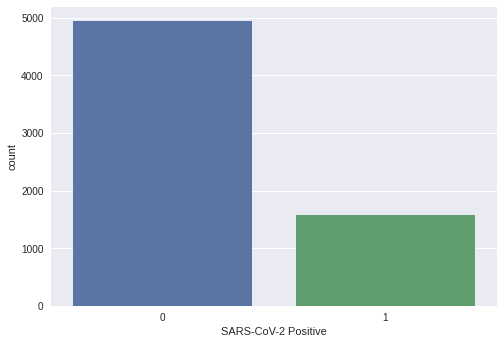

In [13]:
# display of data distribution distribution on SARS-CoV-2 Positive - (positive-1, Suspected-0)
sns.countplot(df['SARS-CoV-2 Positive'], label="SARS-CoV-2 Positive")

In [14]:
# SARS-CoV-2 Positive
# positive --> 1
# Suspected --> 0
df['SARS-CoV-2 Positive'].unique()

array([0, 1])

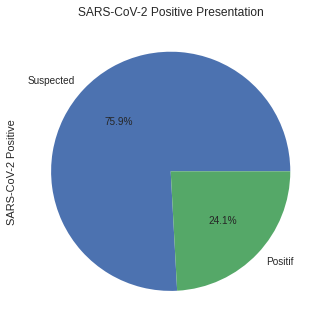

In [15]:
target = df['SARS-CoV-2 Positive'].value_counts()
label =['Suspected', 'Positif']
target.plot(kind='pie', labels=label, autopct='%1.1f%%')
plt.title('SARS-CoV-2 Positive Presentation')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


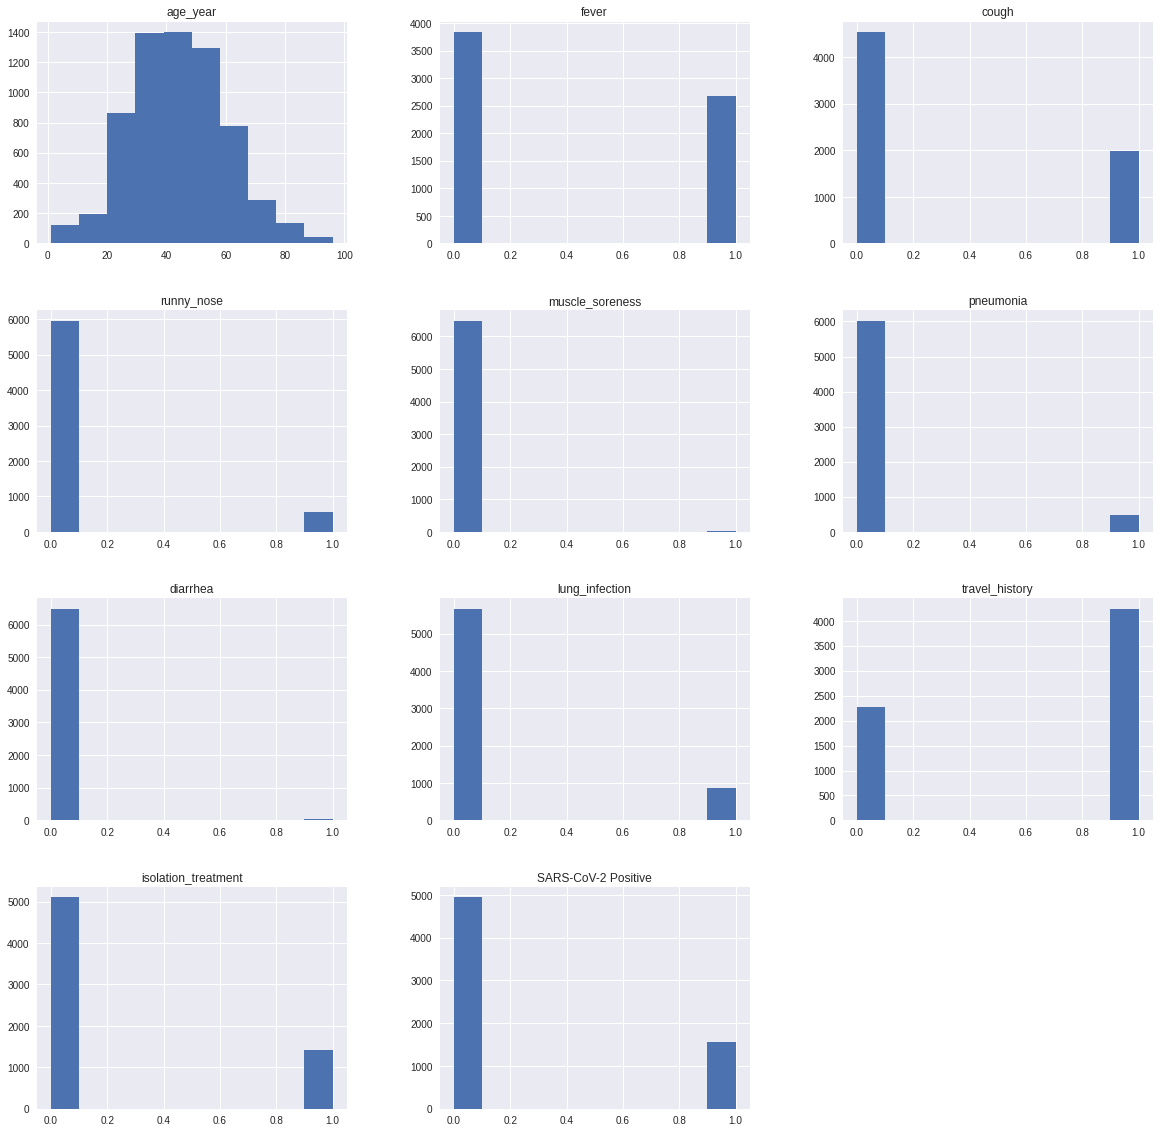

In [16]:
fig = plt.figure(figsize=(20, 20))
axs = fig.add_subplot()
df.hist(ax=axs);

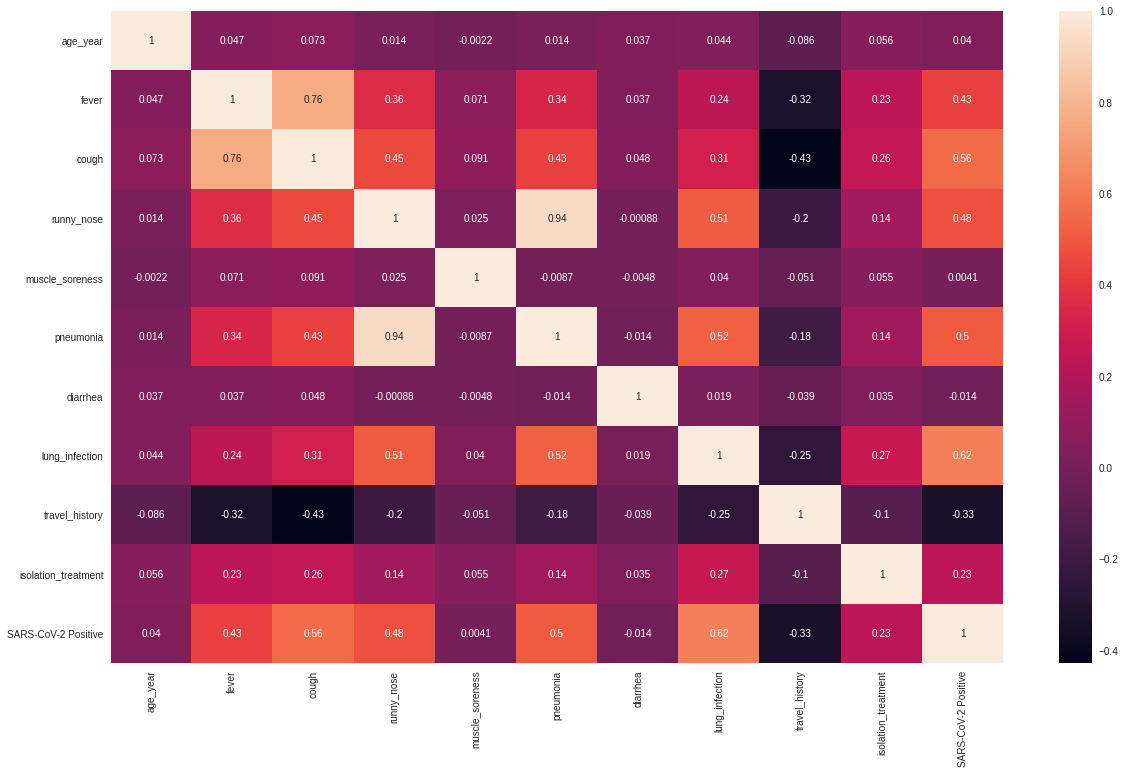

In [17]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df.corr(), annot=True)

# Data cleaning
check missing value, Check duplicate value, check data type, check outlier, check typo, check imbalance data


## -- Check missing value

In [18]:
# Check missing value
df.isnull().sum()

gender                 0
age_year               0
fever                  0
cough                  0
runny_nose             0
muscle_soreness        0
pneumonia              0
diarrhea               0
lung_infection         0
travel_history         0
isolation_treatment    0
SARS-CoV-2 Positive    0
dtype: int64

In [19]:
# Preview rows contain missing value
# NOte : There is no preview because the data is not null

# if df.isnull().any(axis=None):
#     print("Preview of data with null values")
#     print("Null values : ", df.isnull().sum().sum())
#     display(df[df.isnull().any(axis=1)])

In [20]:
# Replace missing value with median value
# df = df.fillna(df.median())

The method chosen to overcome missing value is the median. <br>
Reason: Columns that have a passing value have a categorical data type.

In [21]:
print("Null values : ",df.isnull().sum().sum())
print("Shape of data: ", df.shape)

Null values :  0
Shape of data:  (6512, 12)


With the replace method, it can overcome missing values without reducing data

## -- Check duplicate

In [22]:
# Check duplicate data
print("Data duplicated: ", df.duplicated().sum())

Data duplicated:  4285


## -- Check imbalance data

0    4940
1    1572
Name: SARS-CoV-2 Positive, dtype: int64


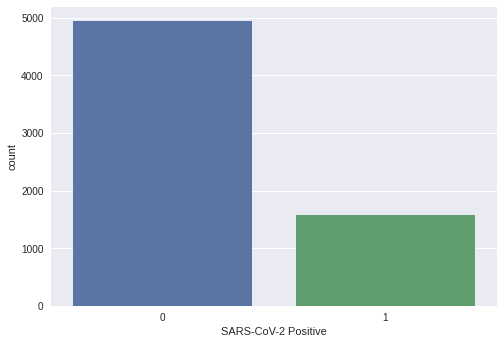

In [23]:
# Check imbalance dataset
import seaborn as sns

sns.countplot(x=df['SARS-CoV-2 Positive'])
print(df['SARS-CoV-2 Positive'].value_counts())

# **Data Preprocessing**

## -- Spitting features and label

In [24]:
features = df.drop(columns=['SARS-CoV-2 Positive'])
label = df[['SARS-CoV-2 Positive']]

print(features.shape)
print(label.shape)

features.columns, label.columns

(6512, 11)
(6512, 1)


(Index(['gender', 'age_year', 'fever', 'cough', 'runny_nose', 'muscle_soreness',
        'pneumonia', 'diarrhea', 'lung_infection', 'travel_history',
        'isolation_treatment'],
       dtype='object'), Index(['SARS-CoV-2 Positive'], dtype='object'))

## -- Check Data type
Menyesuaikan tipe data sesuai dengan metadata yang diberikan

* **Categorical** (`gender`, `fever`, `cough`, `runny_nose`, `muscle_soreness`, `pneumonia`, `diarrhea`, `lung_infection`, `travel_history`, `isolation_treatment`, `SARS-CoV-2 Positive`)
* **Numeric** (`age_year`)

In [25]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               6512 non-null   object
 1   age_year             6512 non-null   int64 
 2   fever                6512 non-null   int64 
 3   cough                6512 non-null   int64 
 4   runny_nose           6512 non-null   int64 
 5   muscle_soreness      6512 non-null   int64 
 6   pneumonia            6512 non-null   int64 
 7   diarrhea             6512 non-null   int64 
 8   lung_infection       6512 non-null   int64 
 9   travel_history       6512 non-null   int64 
 10  isolation_treatment  6512 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 559.8+ KB


In [26]:
col_cat_features = ['gender', 'fever', 'cough', 'runny_nose', 'muscle_soreness',
       'pneumonia', 'diarrhea', 'lung_infection', 'travel_history',
       'isolation_treatment']

features[col_cat_features] = features[col_cat_features].astype('category')

In [27]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               6512 non-null   category
 1   age_year             6512 non-null   int64   
 2   fever                6512 non-null   category
 3   cough                6512 non-null   category
 4   runny_nose           6512 non-null   category
 5   muscle_soreness      6512 non-null   category
 6   pneumonia            6512 non-null   category
 7   diarrhea             6512 non-null   category
 8   lung_infection       6512 non-null   category
 9   travel_history       6512 non-null   category
 10  isolation_treatment  6512 non-null   category
dtypes: category(10), int64(1)
memory usage: 115.5 KB


In [28]:
label_types = ['Positive', 'Suspected']

## -- Normalize Data

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
mx = MinMaxScaler()

In [31]:
features['age_year'] = mx.fit_transform(features[['age_year']])
features.head(2)

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment
0,male,0.926316,1,1,0,0,0,0,0,1,0
1,male,0.705263,1,0,0,0,0,0,0,0,0


## -- Categorical

Change the categorical column to one hot encoding

In [32]:
features_cat = pd.get_dummies(features[col_cat_features])
features = pd.concat([features, features_cat], axis = 1)
features = features.drop(columns = col_cat_features)
features.head()

,age_year,gender_female,gender_male,fever_0,fever_1,cough_0,cough_1,runny_nose_0,runny_nose_1,muscle_soreness_0,muscle_soreness_1,pneumonia_0,pneumonia_1,diarrhea_0,diarrhea_1,lung_infection_0,lung_infection_1,travel_history_0,travel_history_1,isolation_treatment_0,isolation_treatment_1
0,0.926316,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0
1,0.705263,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,0.705263,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0
3,0.705263,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1
4,0.515789,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0


In [33]:
label_cat = pd.get_dummies(label['SARS-CoV-2 Positive'], prefix="sars")
label = pd.concat([label, label_cat], axis = 1)
label = label.drop(columns = 'SARS-CoV-2 Positive')
label.head()

,sars_0,sars_1
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


## -- Split Data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, label, test_size=0.3, shuffle=True, stratify=label)

In [36]:
X_train.shape, X_validate.shape

((4558, 21), (1954, 21))

In [37]:
y_train.count()

sars_0    4558
sars_1    4558
dtype: int64

In [38]:
y_validate.count()

sars_0    1954
sars_1    1954
dtype: int64

# **Data Modelling**

## -- Train Model

In [39]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=features.shape),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6512, 128)         2816      
_________________________________________________________________
dense_1 (Dense)              (None, 6512, 64)          8256      
_________________________________________________________________
dense_2 (Dense)              (None, 6512, 32)          2080      
_________________________________________________________________
dense_3 (Dense)              (None, 6512, 2)           66        
Total params: 13,218
Trainable params: 13,218
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [41]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 95%!")
callbacks = myCallback()

In [42]:
history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=500, batch_size=len(X_train), callbacks=[callbacks], verbose=1)

history.history['accuracy'][-1]

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.7825 - accuracy: 0.2413 - val_loss: 0.7510 - val_accuracy: 0.2400
Epoch 2/500
1/1 [==============================] - 0s 43ms/step - loss: 0.7519 - accuracy: 0.2411 - val_loss: 0.7268 - val_accuracy: 0.2385
Epoch 3/500
1/1 [==============================] - 0s 39ms/step - loss: 0.7275 - accuracy: 0.2424 - val_loss: 0.7070 - val_accuracy: 0.3178
Epoch 4/500
1/1 [==============================] - 0s 45ms/step - loss: 0.7075 - accuracy: 0.3172 - val_loss: 0.6909 - val_accuracy: 0.3337
Epoch 5/500
1/1 [==============================] - 0s 47ms/step - loss: 0.6913 - accuracy: 0.3289 - val_loss: 0.6765 - val_accuracy: 0.7615
Epoch 6/500
1/1 [==============================] - 0s 45ms/step - loss: 0.6767 - accuracy: 0.7538 - val_loss: 0.6631 - val_accuracy: 0.7958
Epoch 7/500
1/1 [==============================] - 0s 45ms/step - loss: 0.6630 - accuracy: 0.7995 - val_loss: 0.6507 - val_accuracy: 0.8383
Epoch 8/500
1/1 [=====

0.9043440222740173

In [43]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_validate, y_validate, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.905, Valid: 0.886


## -- Plot Model

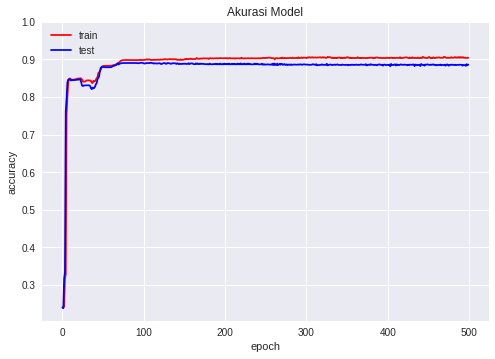

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.ylim(top=1)
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

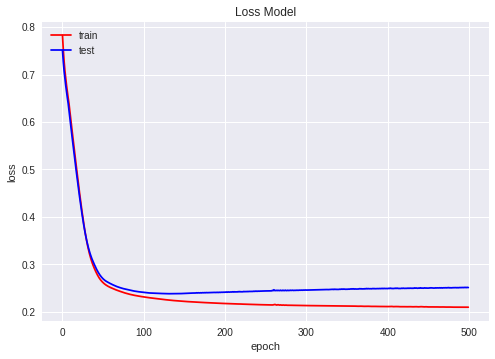

In [45]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## -- Predict and Evaluate Model

In [46]:
predictions = model.predict(X_validate)

In [47]:
y_validate

,sars_0,sars_1
510,1,0
1945,1,0
2068,1,0
1299,1,0
2922,0,1
...,...,...
6276,1,0
5795,1,0
6330,0,1
1005,1,0


In [48]:
y_pred = np.argmax(predictions, axis=1)
y_validate = np.argmax(y_validate.values, axis=1)

In [49]:
y_validate

array([0, 0, 0, ..., 1, 0, 0])

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_validate, y_pred)

0.8863868986693961

In [51]:
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

Accuracy is: 0.8863868986693961


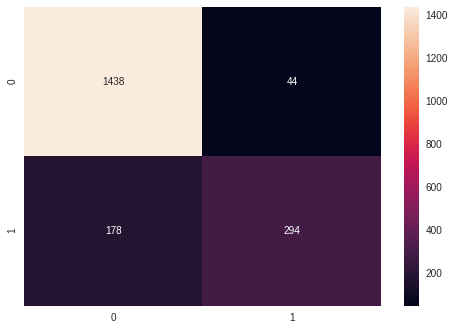

In [52]:
ac= accuracy_score(y_validate, y_pred)
print('Accuracy is:', ac)
cm = confusion_matrix(y_validate, y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [53]:
from sklearn.metrics import classification_report

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_validate, y_pred, labels=[1,0])) # positive-1, suspected-0
confusion = pd.DataFrame(cm, index=['is_covid', 'is_suspected'],
                         columns=['predicted_covid', 'predicted_suspected'])
confusion

,predicted_covid,predicted_suspected
is_covid,294,178
is_suspected,44,1438


In [55]:
print('Acc',classification_report(y_validate, y_pred))

Acc               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1482
           1       0.87      0.62      0.73       472

    accuracy                           0.89      1954
   macro avg       0.88      0.80      0.83      1954
weighted avg       0.89      0.89      0.88      1954



## -- Save Model


In [56]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 200
drwxr-xr-x 2 root root   4096 May 31 07:21 assets
-rw-r--r-- 1 root root  10062 May 31 07:21 keras_metadata.pb
-rw-r--r-- 1 root root 183314 May 31 07:21 saved_model.pb
drwxr-xr-x 2 root root   4096 May 31 07:21 variables


In [57]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'covid_model_01.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('covid_labels_01.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [58]:
try:
    files.download('covid_model_01.tflite')
    files.download('covid_labels_01.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>